In [1]:
# coonfigure gpu memory
import keras 
from keras import backend as K
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))



from keras.datasets import imdb


Using TensorFlow backend.


In [7]:
max_features = 10000
maxlen = 20


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

In [8]:
len(train_data[0]), train_labels[0], len(train_data), len(train_labels)

(218, 1, 25000, 25000)

In [169]:
len(train_data[0] )

218

In [170]:
max([max(sequence) for sequence in train_data])

9999

In [171]:
# decode vector to english words

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [172]:
 # one hot encoding
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results    

In [179]:
 x_test.shape

(25000, 10000)

In [178]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [180]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [207]:
from keras import models
from keras import layers

#reset_graph() # cannot used
K.clear_session()
model = models.Sequential()
model.add(layers.Dense(128, activation="tanh", input_shape=(10000,)))
model.add(layers.Dense(128, activation="tanh"))
#model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1,  activation="sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,296,769
Trainable params: 1,296,769
Non-trainable params: 0
_________________________________________________________________


In [208]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [195]:
# split data to tune best epochs

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [209]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor="acc",
    patience=1, ),
    keras.callbacks.ModelCheckpoint(
        filepath="my_model.h5",
        monitor="val_loss",
        save_best_only=True,)     
]

In [210]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    callbacks=callbacks_list,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.4956 - acc: 0.7755 - val_loss: 0.3170 - val_acc: 0.8727
Epoch 2/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.2418 - acc: 0.9039 - val_loss: 0.3179 - val_acc: 0.8695
Epoch 3/20
15000/15000 [==============================] - 3s 176us/step - loss: 0.1896 - acc: 0.9262 - val_loss: 0.2894 - val_acc: 0.8850
Epoch 4/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.1324 - acc: 0.9513 - val_loss: 0.3788 - val_acc: 0.8691
Epoch 5/20
15000/15000 [==============================] - 3s 176us/step - loss: 0.1208 - acc: 0.9562 - val_loss: 0.3650 - val_acc: 0.8776
Epoch 6/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.0930 - acc: 0.9687 - val_loss: 0.4254 - val_acc: 0.8726
Epoch 7/20
15000/15000 [==============================] - 3s 200us/step - loss: 0.0796 - acc: 0.9732 - val_loss: 0.4734 - 

In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])

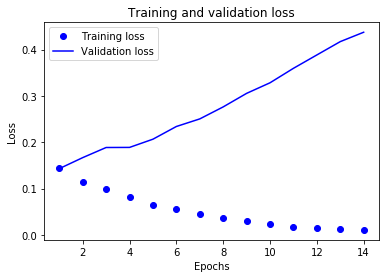

In [48]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

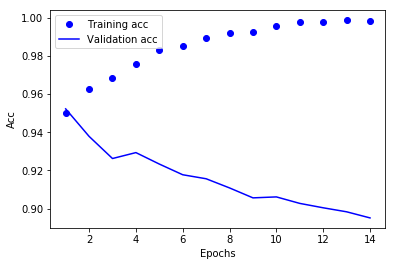

In [49]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = "Training acc")
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()


In [211]:
# fit less 
import keras

callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor="acc",
    patience=1, ),
    
    keras.callbacks.ModelCheckpoint(
        filepath="my_model.h5",
        monitor="val_loss",
        save_best_only=True,)     
]


K.clear_session()
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1,  activation="sigmoid"))

model.compile(optimizer = 'rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512,
                    callbacks=callbacks_list,
                    validation_data=(x_val, y_val))



Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 162us/step - loss: 0.4468 - acc: 0.8120 - val_loss: 0.2725 - val_acc: 0.9151
Epoch 2/4
25000/25000 [==============================] - 4s 151us/step - loss: 0.2544 - acc: 0.9110 - val_loss: 0.2013 - val_acc: 0.9331
Epoch 3/4
25000/25000 [==============================] - 4s 151us/step - loss: 0.1949 - acc: 0.9299 - val_loss: 0.1461 - val_acc: 0.9560
Epoch 4/4
25000/25000 [==============================] - 4s 153us/step - loss: 0.1619 - acc: 0.9428 - val_loss: 0.1229 - val_acc: 0.9633


In [50]:
results = model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 3s 140us/step


[0.6643159680914879, 0.85604]

In [51]:
model.predict(x_test)

array([[0.01311135],
       [1.        ],
       [0.9842337 ],
       ...,
       [0.01272768],
       [0.02376787],
       [0.88717794]], dtype=float32)

In [59]:
max_features = 10000


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


In [53]:
x_train.shape,len(y_test), len(x_train[0]) #, x_train[0], y_test 

((25000,), 25000, 218)

In [216]:
max_features = 10000
maxlen = 100

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

## Using embedding

array([ 163,   11, 3215,    2,    4, 1153,    9,  194,  775,    7, 8255,
          2,  349, 2637,  148,  605,    2, 8003,   15,  123,  125,   68,
          2, 6853,   15,  349,  165, 4362,   98,    5,    4,  228,    9,
         43,    2, 1157,   15,  299,  120,    5,  120,  174,   11,  220,
        175,  136,   50,    9, 4373,  228, 8255,    5,    2,  656,  245,
       2350,    5,    4, 9837,  131,  152,  491,   18,    2,   32, 7464,
       1212,   14,    9,    6,  371,   78,   22,  625,   64, 1382,    9,
          8,  168,  145,   23,    4, 1690,   15,   16,    4, 1355,    5,
         28,    6,   52,  154,  462,   33,   89,   78,  285,   16,  145,
         95], dtype=int32)

In [226]:

# processing with Embedding layer 

from keras import preprocessing 
# convert list to array, only keep the last maxlen numbers, truncate the begining sequence
x_train = preprocessing.sequence.pad_sequences(train_data, maxlen = maxlen)

x_test = preprocessing.sequence.pad_sequences(test_data, maxlen = maxlen)

In [218]:
x_train = np.asarray(x_train).astype('float32')
x_test  = np.asarray(x_test).astype('float32')

In [229]:
x_train.shape,len(y_test), len(x_train[0]), x_train[2], y_test 

((25000, 100),
 25000,
 100,
 array([1301,    4, 1873,   33,   89,   78,   12,   66,   16,    4,  360,
           7,    4,   58,  316,  334,   11,    4, 1716,   43,  645,  662,
           8,  257,   85, 1200,   42, 1228, 2578,   83,   68, 3912,   15,
          36,  165, 1539,  278,   36,   69,    2,  780,    8,  106,   14,
        6905, 1338,   18,    6,   22,   12,  215,   28,  610,   40,    6,
          87,  326,   23, 2300,   21,   23,   22,   12,  272,   40,   57,
          31,   11,    4,   22,   47,    6, 2307,   51,    9,  170,   23,
         595,  116,  595, 1352,   13,  191,   79,  638,   89,    2,   14,
           9,    8,  106,  607,  624,   35,  534,    6,  227,    7,  129,
         113], dtype=int32),
 array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))

In [237]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

K.clear_session()

model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen, name = "features")) # train data cannot be one hot

model.add(Flatten())

model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics=["acc"])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
features (Embedding)         (None, 100, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 801       
Total params: 80,801
Trainable params: 80,801
Non-trainable params: 0
_________________________________________________________________


In [57]:
# !mkdir my_log_dir

callbacks = [ 
    keras.callbacks.TensorBoard(
        log_dir = "my_log_dir", 
        histogram_freq = 1,
        embeddings_freq = 1,
        embeddings_layer_names=['features'],
        embeddings_data = x_train,
        )]

Instructions for updating:
Use the retry module or similar alternatives.


In [157]:
x_test.shape, x_test.dtype, x_train.shape

((25000, 100), dtype('float32'), (25000, 100))

In [239]:
history = model.fit(x_train, 
                   y_train,
                   epochs=10,
                   batch_size=32,
                   callbacks = callbacks,
                   #validation_split=0.2)
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 6s 237us/step - loss: 0.5919 - acc: 0.7010 - val_loss: 0.4210 - val_acc: 0.8263
Epoch 2/10
25000/25000 [==============================] - 5s 216us/step - loss: 0.3420 - acc: 0.8582 - val_loss: 0.3299 - val_acc: 0.8546
Epoch 3/10
25000/25000 [==============================] - 6s 220us/step - loss: 0.2780 - acc: 0.8856 - val_loss: 0.3172 - val_acc: 0.8602
Epoch 4/10
25000/25000 [==============================] - 5s 219us/step - loss: 0.2477 - acc: 0.8984 - val_loss: 0.3163 - val_acc: 0.8628
Epoch 5/10
25000/25000 [==============================] - 6s 220us/step - loss: 0.2267 - acc: 0.9087 - val_loss: 0.3238 - val_acc: 0.8619
Epoch 6/10
25000/25000 [==============================] - 5s 217us/step - loss: 0.2086 - acc: 0.9167 - val_loss: 0.3277 - val_acc: 0.8606
Epoch 7/10
25000/25000 [==============================] - 6s 220us/step - loss: 0.1919 - acc: 0.9278 - val_loss: 0.3361 - 

# download the raw IMDB data

In [79]:


import os

imdb_dir = '/home/lixiaochuan/Downloads/kaggle_data/aclImdb/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
        
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)



In [80]:
len(texts), len(labels)

(25000, 25000)

In [18]:
#list(word_index.keys())[:10], list(word_index.values())[:10]

(['waas',
  "'some'",
  'vertebrae',
  'utilise',
  "pet'",
  'bindings',
  "'attacker'",
  'paesan',
  'nec',
  'hasselhoff'],
 [77237, 57644, 63855, 32382, 57138, 74510, 71290, 71154, 73789, 13737])

In [81]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


maxlen = 200
training_samples = 10000 #10000
validation_samples = 5000 #10000
max_words = 10000
embedding_dim = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index)) # more than specified max_words, how the words not in the top max words represented?
data = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 200)
Shape of label tensor: (25000,)


In [82]:
#len(set([value for key, value in word_index.items()])) # total number of words 
# check the max_len effect 

len(sequences[0]),len(list(set(sequences[0])))
output = set([])

for sequence in sequences:
    output = output | set(sequence) 
    
    
    
len(list(output))


9999

 

# use precomputed GLOVE word embedding

In [83]:
# use precomputed GLOVE word embedding

glove_dir = '/home/lixiaochuan/Downloads/kaggle_data/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

print(f)

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
    
print('Found %s word vectors.' % len(embeddings_index))

<_io.TextIOWrapper name='/home/lixiaochuan/Downloads/kaggle_data/glove.6B/glove.6B.100d.txt' mode='r' encoding='UTF-8'>
Found 400000 word vectors.


In [84]:
len(coefs), word, coefs, embeddings_index[word] #word_index 

(100,
 'sandberger',
 array([ 0.28365  , -0.6263   , -0.44351  ,  0.2177   , -0.087421 ,
        -0.17062  ,  0.29266  , -0.024899 ,  0.26414  , -0.17023  ,
         0.25817  ,  0.097484 , -0.33103  , -0.43859  ,  0.0095799,
         0.095624 , -0.17777  ,  0.38886  ,  0.27151  ,  0.14742  ,
        -0.43973  , -0.26588  , -0.024271 ,  0.27186  , -0.36761  ,
        -0.24827  , -0.20815  ,  0.22128  , -0.044409 ,  0.021373 ,
         0.24594  ,  0.26143  ,  0.29303  ,  0.13281  ,  0.082232 ,
        -0.12869  ,  0.1622   , -0.22567  , -0.060348 ,  0.28703  ,
         0.11381  ,  0.34839  ,  0.3419   ,  0.36996  , -0.13592  ,
         0.0062694,  0.080317 ,  0.0036251,  0.43093  ,  0.01882  ,
         0.31008  ,  0.16722  ,  0.074112 , -0.37745  ,  0.47363  ,
         0.41284  ,  0.24471  ,  0.075965 , -0.51725  , -0.49481  ,
         0.526    , -0.074645 ,  0.41434  , -0.1956   , -0.16544  ,
        -0.045649 , -0.40153  , -0.13136  , -0.4672   ,  0.18825  ,
         0.2612   ,  0.1685

In [66]:
list(word_index.items())[:10]

[('privates', 23342),
 ('bungler', 36657),
 ("sawyer's", 39516),
 ("rozema's", 66643),
 ('recycled', 5284),
 ('vhs', 1774),
 ('arbitrary', 10349),
 ('doll', 3150),
 ('combustion', 75227),
 ('berry', 10198)]

In [85]:
# create embedding matrix
embedding_dim = 100 # should match with downloaded glove embedding size
embedding_matrix = np.zeros((max_words, embedding_dim)) # be careful of the dimension

# build the top 10000 (max_words) embedding matrix
for word, i in word_index.items(): # word_index is ordered by frequency, 
    if i < max_words:
        embedding_vector = embeddings_index.get(word) # embeddings_index: saved 400k glove embedding
        
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [86]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

#K.clear_session()

model5 = Sequential()
model5.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model5.add(Flatten())
model5.add(Dense(32, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 200, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                640032    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 1,640,065
Trainable params: 1,640,065
Non-trainable params: 0
_________________________________________________________________


In [87]:

# what is the use of this? set the embedding
model5.layers[0].set_weights([embedding_matrix])
model5.layers[0].trainable = False

In [46]:
#!mkdir log_glove_embedding

In [90]:
import keras

callbacks_list1 = [
    keras.callbacks.EarlyStopping(
    monitor="acc",
    patience=1, ),
  
]

callbacks_list2 = [
        keras.callbacks.ModelCheckpoint(
        filepath="my_model.h5",
        monitor="val_loss",
        save_best_only=True,)   
]
callbacks_g = [ 
    keras.callbacks.TensorBoard(
        log_dir = "log_glove_embedding",
        histogram_freq = 1,
        embeddings_freq = 1,
        embeddings_layer_names=['embedding_1'],
        embeddings_data = x_train,
        )]


In [91]:
model5.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
history = model5.fit(x_train, y_train, epochs=10, batch_size=32, 
                    callbacks =callbacks_list1,
                    validation_data=(x_val, y_val))



Train on 10000 samples, validate on 5000 samples
Epoch 1/10
10000/10000 [==============================] - 3s 316us/step - loss: 0.6965 - acc: 0.6022 - val_loss: 0.6183 - val_acc: 0.6594
Epoch 2/10
10000/10000 [==============================] - 2s 209us/step - loss: 0.5274 - acc: 0.7470 - val_loss: 0.6457 - val_acc: 0.6644
Epoch 3/10
10000/10000 [==============================] - 2s 210us/step - loss: 0.4031 - acc: 0.8219 - val_loss: 0.7480 - val_acc: 0.6426
Epoch 4/10
10000/10000 [==============================] - 2s 207us/step - loss: 0.3154 - acc: 0.8743 - val_loss: 0.6114 - val_acc: 0.7018
Epoch 5/10
10000/10000 [==============================] - 2s 220us/step - loss: 0.2293 - acc: 0.9143 - val_loss: 0.7081 - val_acc: 0.6930
Epoch 6/10
10000/10000 [==============================] - 2s 208us/step - loss: 0.1711 - acc: 0.9388 - val_loss: 0.7815 - val_acc: 0.6896
Epoch 7/10
10000/10000 [==============================] - 2s 210us/step - loss: 0.1315 - acc: 0.9554 - val_loss: 0.8746 - v

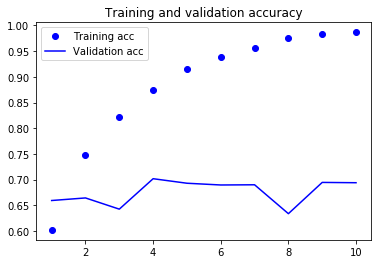

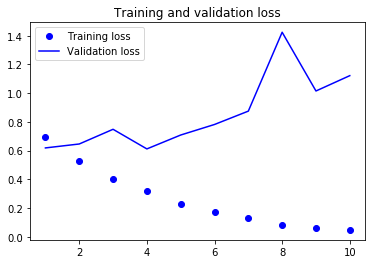

In [92]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [93]:
# use functional API
from keras import Input, layers
from keras.models import Model

#K.clear_session()

input_tensor = Input(shape=(maxlen,))
x = layers.Embedding(output_dim=embedding_dim, input_dim=max_words, input_length=maxlen)(input_tensor) # embedding dimension is reversed
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(1, activation = 'sigmoid')(x)

model6 = Model(input_tensor, output_tensor)
model6.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 200, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                640032    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 1,640,065
Trainable params: 1,640,065
Non-trainable params: 0
_________________________________________________________________


In [94]:
model6.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
history = model6.fit(x_train, y_train, epochs=10, batch_size=32, 
                    callbacks =callbacks_list1,
                    validation_data=(x_val, y_val))

Train on 10000 samples, validate on 5000 samples
Epoch 1/10
10000/10000 [==============================] - 3s 335us/step - loss: 0.5450 - acc: 0.7000 - val_loss: 0.4322 - val_acc: 0.8030
Epoch 2/10
10000/10000 [==============================] - 2s 220us/step - loss: 0.1420 - acc: 0.9478 - val_loss: 0.4215 - val_acc: 0.8240
Epoch 3/10
10000/10000 [==============================] - 2s 226us/step - loss: 0.0145 - acc: 0.9964 - val_loss: 0.5574 - val_acc: 0.8240
Epoch 4/10
10000/10000 [==============================] - 2s 229us/step - loss: 8.6710e-04 - acc: 0.9999 - val_loss: 0.7634 - val_acc: 0.8116
Epoch 5/10
10000/10000 [==============================] - 2s 225us/step - loss: 1.2208e-04 - acc: 0.9999 - val_loss: 0.8833 - val_acc: 0.8054


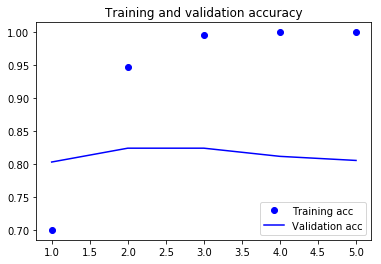

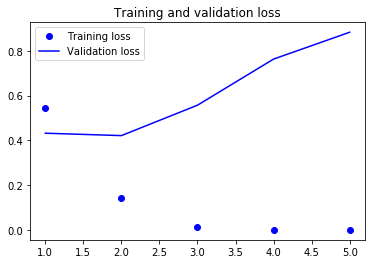

In [95]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [96]:
#Listing 6.17 Tokenizing the data of the test set
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)

    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())            
            f.close()

        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
        
x_test = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
y_test = np.asarray(labels)


In [97]:
x_test.shape, y_test.shape

((25000, 200), (25000,))

In [98]:
model6.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 79us/step


[0.9401714559268206, 0.79144]

In [99]:
# simple RNN

from keras.layers import SimpleRNN
batch_size = 32


In [100]:
max_words, embedding_dim,  maxlen, batch_size

(10000, 100, 200, 32)

In [101]:
#K.clear_session()

input_tensor = Input(shape=(maxlen,))
x = layers.Embedding(output_dim=embedding_dim, input_dim=max_words, input_length=maxlen)(input_tensor) # embedding dimension is reversed
#x = layers.Flatten()(x)
x = layers.SimpleRNN(units=batch_size, recurrent_dropout=0.0, stateful = False)(x)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(1, activation = 'sigmoid')(x)

model8a = Model(input_tensor, output_tensor)
model8a.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 200, 100)          1000000   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 1,005,345
Trainable params: 1,005,345
Non-trainable params: 0
_________________________________________________________________


In [41]:
#K.clear_session()
model8 = Sequential()
model8.add(Embedding(max_words, embedding_dim))
model8.add(SimpleRNN(units=batch_size, recurrent_dropout=0.0, stateful = False)) 
# drop out reduce train data performance , but no improvement on validation dataset
model8.add(Dense(32, activation='relu')) # add another dense layer, no help
model8.add(Dense(1, activation='sigmoid'))          
model8.summary()

# basic Simple RNN is not working

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,005,345
Trainable params: 1,005,345
Non-trainable params: 0
_________________________________________________________________


In [102]:
#  set the pretrained embedding
model8a.layers[1].set_weights([embedding_matrix])
model8a.layers[1].trainable = False

(10000, 100)

In [122]:
model8a.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

# does batch size here should be consistant with the batch size of simpleRNN? here it is for gradient update
history = model8a.fit(x_train, y_train, epochs = 10, batch_size =128, validation_data=(x_val, y_val))

Train on 10000 samples, validate on 5000 samples
Epoch 1/10
10000/10000 [==============================] - 20s 2ms/step - loss: 0.6594 - acc: 0.5796 - val_loss: 0.7060 - val_acc: 0.5260
Epoch 2/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.6546 - acc: 0.5811 - val_loss: 0.7044 - val_acc: 0.5306
Epoch 3/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.6524 - acc: 0.5834 - val_loss: 0.7161 - val_acc: 0.5206
Epoch 4/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.6494 - acc: 0.5885 - val_loss: 0.7090 - val_acc: 0.5232
Epoch 5/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.6457 - acc: 0.5898 - val_loss: 0.7121 - val_acc: 0.5208
Epoch 6/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.6420 - acc: 0.5946 - val_loss: 0.7169 - val_acc: 0.5234
Epoch 7/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.6365 - acc: 0.6024 - val_loss: 0.7196 - val_acc:

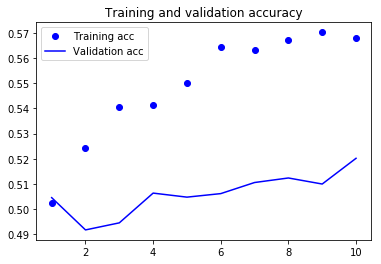

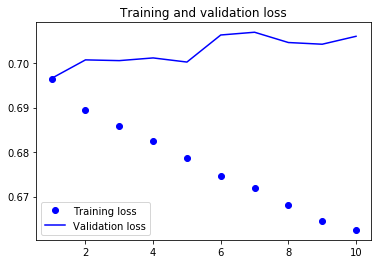

In [106]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [107]:
# LSTM model 

from keras.layers import LSTM



In [108]:
model9 = Sequential()
model9.add(Embedding(max_words, embedding_dim))
model9.add(LSTM(batch_size))
model9.add(Dense(1, activation='sigmoid'))          
model9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 100)         1000000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________


In [109]:
model9.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

history = model9.fit(x_train, y_train, epochs = 20, batch_size =128, 
                     callbacks =callbacks_list1, 
                     validation_data=(x_val, y_val))

Train on 10000 samples, validate on 5000 samples
Epoch 1/20
10000/10000 [==============================] - 48s 5ms/step - loss: 0.6928 - acc: 0.5105 - val_loss: 0.6920 - val_acc: 0.5136
Epoch 2/20
10000/10000 [==============================] - 46s 5ms/step - loss: 0.6392 - acc: 0.6586 - val_loss: 0.6837 - val_acc: 0.5680
Epoch 3/20
10000/10000 [==============================] - 46s 5ms/step - loss: 0.5302 - acc: 0.7691 - val_loss: 0.6093 - val_acc: 0.7170
Epoch 4/20
10000/10000 [==============================] - 46s 5ms/step - loss: 0.4617 - acc: 0.8278 - val_loss: 0.5758 - val_acc: 0.7662
Epoch 5/20
10000/10000 [==============================] - 46s 5ms/step - loss: 0.3940 - acc: 0.8620 - val_loss: 0.5251 - val_acc: 0.7866
Epoch 6/20
10000/10000 [==============================] - 46s 5ms/step - loss: 0.3442 - acc: 0.8883 - val_loss: 0.4563 - val_acc: 0.8332
Epoch 7/20
10000/10000 [==============================] - 46s 5ms/step - loss: 0.3176 - acc: 0.8992 - val_loss: 0.4755 - val_acc:

In [124]:
# K.clear_session()

input_tensor = Input(shape=(maxlen,))
x = layers.Embedding(output_dim=embedding_dim, input_dim=max_words, input_length=maxlen)(input_tensor) # embedding dimension is reversed
#x = layers.Flatten()(x)
x = layers.LSTM(units=batch_size, recurrent_dropout=0.0, stateful = False)(x)
#x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(1, activation = 'sigmoid')(x)

model9a = Model(input_tensor, output_tensor)
model9a.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_18 (Embedding)     (None, 200, 100)          1000000   
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                17024     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________


In [125]:
model9a.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

history = model9a.fit(x_train, y_train, epochs = 20, batch_size =128, 
                     callbacks =callbacks_list1, 
                     validation_data=(x_val, y_val))

Train on 10000 samples, validate on 5000 samples
Epoch 1/20
10000/10000 [==============================] - 51s 5ms/step - loss: 0.6924 - acc: 0.5157 - val_loss: 0.6911 - val_acc: 0.5062
Epoch 2/20
10000/10000 [==============================] - 50s 5ms/step - loss: 0.6237 - acc: 0.6866 - val_loss: 0.5929 - val_acc: 0.7378
Epoch 3/20
10000/10000 [==============================] - 49s 5ms/step - loss: 0.5055 - acc: 0.7910 - val_loss: 0.6302 - val_acc: 0.7218
Epoch 4/20
10000/10000 [==============================] - 48s 5ms/step - loss: 0.4222 - acc: 0.8453 - val_loss: 0.4638 - val_acc: 0.8188
Epoch 5/20
10000/10000 [==============================] - 52s 5ms/step - loss: 0.4107 - acc: 0.8515 - val_loss: 0.4360 - val_acc: 0.8322
Epoch 6/20
10000/10000 [==============================] - 51s 5ms/step - loss: 0.3520 - acc: 0.8829 - val_loss: 0.5044 - val_acc: 0.8012
Epoch 7/20
10000/10000 [==============================] - 50s 5ms/step - loss: 0.3181 - acc: 0.8964 - val_loss: 0.4261 - val_acc:

In [131]:
# stacked LSTM

input_tensor = Input(shape=(maxlen,))
x = layers.Embedding(output_dim=embedding_dim, input_dim=max_words, input_length=maxlen)(input_tensor) # embedding dimension is reversed
#x = layers.Flatten()(x)
x = layers.LSTM(units=batch_size, return_sequences = True, recurrent_dropout=0.0, stateful = False)(x)
x = layers.LSTM(units=batch_size, return_sequences = False, recurrent_dropout=0.0, stateful = False)(x)
#x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(1, activation = 'sigmoid')(x)

model9b = Model(input_tensor, output_tensor)
model9b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_20 (Embedding)     (None, 200, 100)          1000000   
_________________________________________________________________
lstm_13 (LSTM)               (None, 200, 32)           17024     
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 1,025,377
Trainable params: 1,025,377
Non-trainable params: 0
_________________________________________________________________


In [132]:
model9b.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

history = model9b.fit(x_train, y_train, epochs = 20, batch_size =128, 
                     callbacks =callbacks_list1, 
                     validation_data=(x_val, y_val))

Train on 10000 samples, validate on 5000 samples
Epoch 1/20
10000/10000 [==============================] - 100s 10ms/step - loss: 0.6865 - acc: 0.5409 - val_loss: 0.6256 - val_acc: 0.6932
Epoch 2/20
10000/10000 [==============================] - 96s 10ms/step - loss: 0.5273 - acc: 0.7649 - val_loss: 0.7310 - val_acc: 0.7306
Epoch 3/20
10000/10000 [==============================] - 96s 10ms/step - loss: 0.4214 - acc: 0.8404 - val_loss: 0.4467 - val_acc: 0.8174
Epoch 4/20
10000/10000 [==============================] - 96s 10ms/step - loss: 0.3620 - acc: 0.8740 - val_loss: 0.4211 - val_acc: 0.8424
Epoch 5/20
10000/10000 [==============================] - 95s 10ms/step - loss: 0.3194 - acc: 0.8952 - val_loss: 0.4314 - val_acc: 0.8360
Epoch 6/20
10000/10000 [==============================] - 97s 10ms/step - loss: 0.3013 - acc: 0.9047 - val_loss: 0.4499 - val_acc: 0.8416
Epoch 7/20
10000/10000 [==============================] - 96s 10ms/step - loss: 0.2749 - acc: 0.9156 - val_loss: 0.4664 - 

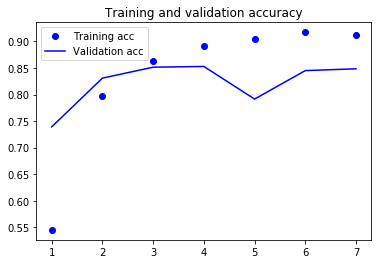

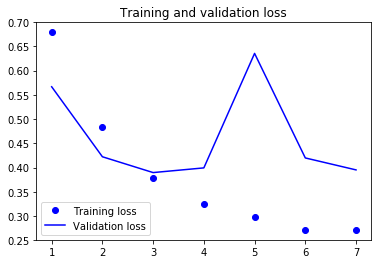

In [128]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [129]:
# use pretrained embedding

model9b.layers[1].set_weights([embedding_matrix])
model9b.layers[1].trainable = False


In [130]:
model9b.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

history = model9b.fit(x_train, y_train, epochs = 20, batch_size =128, 
                     callbacks =callbacks_list1, validation_data=(x_val, y_val))

Train on 10000 samples, validate on 5000 samples
Epoch 1/20
10000/10000 [==============================] - 96s 10ms/step - loss: 0.6997 - acc: 0.5283 - val_loss: 1.2597 - val_acc: 0.4980
Epoch 2/20
10000/10000 [==============================] - 93s 9ms/step - loss: 0.6728 - acc: 0.5911 - val_loss: 0.6715 - val_acc: 0.5978
Epoch 3/20
10000/10000 [==============================] - 93s 9ms/step - loss: 0.6421 - acc: 0.6439 - val_loss: 0.6223 - val_acc: 0.6638
Epoch 4/20
10000/10000 [==============================] - 93s 9ms/step - loss: 0.6091 - acc: 0.6805 - val_loss: 0.6316 - val_acc: 0.6706
Epoch 5/20
10000/10000 [==============================] - 93s 9ms/step - loss: 0.5743 - acc: 0.7099 - val_loss: 0.5756 - val_acc: 0.6804
Epoch 6/20
10000/10000 [==============================] - 93s 9ms/step - loss: 0.5670 - acc: 0.7173 - val_loss: 0.5996 - val_acc: 0.6860
Epoch 7/20
10000/10000 [==============================] - 93s 9ms/step - loss: 0.5467 - acc: 0.7411 - val_loss: 0.5197 - val_acc

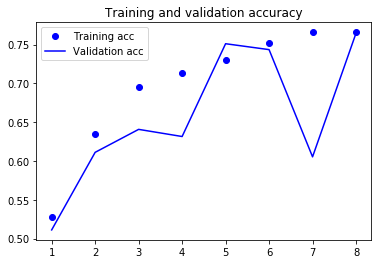

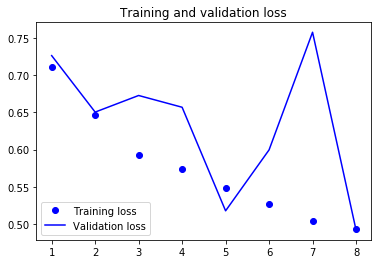

In [113]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [114]:
 x_train.shape

(10000, 200)

In [115]:
# bidirectional
from keras import layers

model10 = Sequential()
model10.add(Embedding(max_words, embedding_dim))
model10.add(layers.Bidirectional(layers.LSTM(batch_size)))
model10.add(Dense(1, activation='sigmoid')) 
model10.summary()
 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 100)         1000000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                34048     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 65        
Total params: 1,034,113
Trainable params: 1,034,113
Non-trainable params: 0
_________________________________________________________________


In [116]:
model10.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

history = model10.fit(x_train, y_train, epochs = 10, batch_size =128, 
                      callbacks =callbacks_list1, validation_data=(x_val, y_val))

Train on 10000 samples, validate on 5000 samples
Epoch 1/10
10000/10000 [==============================] - 90s 9ms/step - loss: 0.6243 - acc: 0.6584 - val_loss: 0.5096 - val_acc: 0.7972
Epoch 2/10
10000/10000 [==============================] - 87s 9ms/step - loss: 0.4341 - acc: 0.8241 - val_loss: 0.4282 - val_acc: 0.8164
Epoch 3/10
10000/10000 [==============================] - 87s 9ms/step - loss: 0.3273 - acc: 0.8744 - val_loss: 0.3630 - val_acc: 0.8526
Epoch 4/10
10000/10000 [==============================] - 87s 9ms/step - loss: 0.2476 - acc: 0.9091 - val_loss: 0.3962 - val_acc: 0.8348
Epoch 5/10
10000/10000 [==============================] - 87s 9ms/step - loss: 0.1929 - acc: 0.9320 - val_loss: 0.3647 - val_acc: 0.8486
Epoch 6/10
10000/10000 [==============================] - 87s 9ms/step - loss: 0.1607 - acc: 0.9449 - val_loss: 0.4419 - val_acc: 0.8516
Epoch 7/10
10000/10000 [==============================] - 87s 9ms/step - loss: 0.1298 - acc: 0.9562 - val_loss: 0.4993 - val_acc:

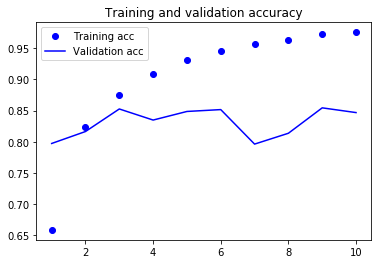

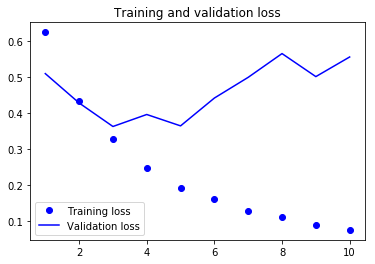

In [117]:
# much better 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [118]:
#Training and evaluating a simple 1D convnet on the IMDB data
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
  
model11 = Sequential()
model11.add(layers.Embedding(max_words, embedding_dim, input_length= maxlen ))
model11.add(layers.Conv1D(32, 7, activation='relu'))
model11.add(layers.MaxPooling1D(5))
model11.add(layers.Conv1D(32, 7, activation='relu'))
model11.add(layers.GlobalMaxPooling1D())
model11.add(layers.Dense(1))
model11.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 200, 100)          1000000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 194, 32)           22432     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 32, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 33        
Total params: 1,029,665
Trainable params: 1,029,665
Non-trainable params: 0
_________________________________________________________________


In [119]:
# this cannot be run multiple times continues
# need to run the above cell to initiate the model first

# sometimes the above cell needs to run several times to be initialized 
model11.compile(optimizer=RMSprop(lr=1e-4), 
                loss='binary_crossentropy',
                metrics=['acc'])
history = model11.fit(x_train, y_train, epochs=10, batch_size=128, 
                      callbacks =callbacks_list1, validation_data=(x_val, y_val))

Train on 10000 samples, validate on 5000 samples
Epoch 1/10
10000/10000 [==============================] - 2s 245us/step - loss: 1.0867 - acc: 0.4920 - val_loss: 0.7448 - val_acc: 0.5108
Epoch 2/10
10000/10000 [==============================] - 1s 79us/step - loss: 0.6919 - acc: 0.5610 - val_loss: 0.6892 - val_acc: 0.5174
Epoch 3/10
10000/10000 [==============================] - 1s 78us/step - loss: 0.6617 - acc: 0.6944 - val_loss: 0.6768 - val_acc: 0.6218
Epoch 4/10
10000/10000 [==============================] - 1s 78us/step - loss: 0.6392 - acc: 0.7914 - val_loss: 0.6650 - val_acc: 0.6724
Epoch 5/10
10000/10000 [==============================] - 1s 79us/step - loss: 0.6134 - acc: 0.8439 - val_loss: 0.6467 - val_acc: 0.7090
Epoch 6/10
10000/10000 [==============================] - 1s 79us/step - loss: 0.5803 - acc: 0.8619 - val_loss: 0.6217 - val_acc: 0.6958
Epoch 7/10
10000/10000 [==============================] - 1s 78us/step - loss: 0.5344 - acc: 0.8633 - val_loss: 0.5708 - val_acc

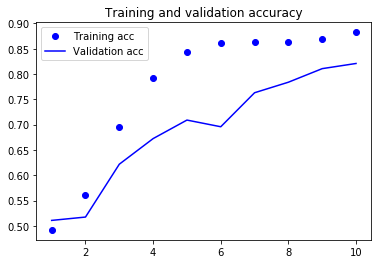

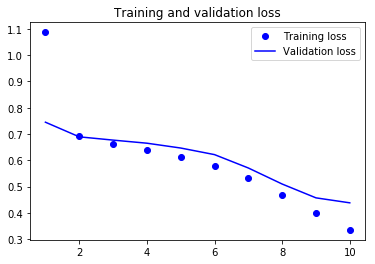

In [120]:
# fast and better 
# embedding dim is important

# peak at 10 epochs and acc drops after that  

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [121]:
model11.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 85us/step


[0.4512112761449814, 0.81404]